# Dimensionality Reduction by Extracting Principal Component

## Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [3]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df.iloc[:, 1:]
y = df['class']

## Split Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

## Import PCA

In [10]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [17]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187]


In [18]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


In [19]:
pca = PCA(n_components=None)

In [20]:
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [22]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [23]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

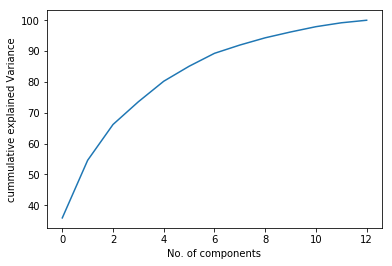

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

***

In [25]:
res = pca.transform(X_train_sc)

In [26]:
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

In [27]:
df1 = pd.DataFrame(res, columns=df.columns[1:], index=index_name)[0:4]
df1.T.sort_values(by="PCA_0")

,PCA_0,PCA_1,PCA_2,PCA_3
Malic acid,-3.615327,-0.482177,1.275033,-2.496962
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823
Magnesium,0.221634,-0.226540,0.215798,-0.003420
Color intensity,0.262397,-0.453600,-0.777822,-0.123055
Nonflavanoid phenols,0.918085,-0.113136,-0.678263,0.150849


##  PCA with 4 components


In [32]:
pca = PCA(n_components=5)

In [33]:
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
X_pca_train = pca.transform(X_train_sc)
X_pca_test = pca.transform(X_test_sc)

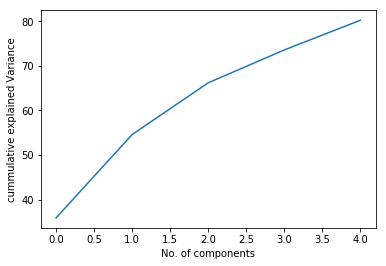

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

## Evaluation Function

In [41]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))

## Model Selection

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
clf = BaggingClassifier()

In [45]:
clf.fit(X_pca_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [46]:
print_score(clf, X_pca_train, X_pca_test, y_train, y_test, train = True)
print_score(clf, X_pca_train, X_pca_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 1.0000

Classification Report : 
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        45
          2       1.00      1.00      1.00        57
          3       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00       142
 

Confusion Metrics : 
 [[45  0  0]
 [ 0 57  0]
 [ 0  0 40]] 

Average Accuracy : 0.9452

Accuracy SD : 0.0504

Test Result : 

Accuracy Score 0.9722

Classification Report : 
              precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.93      0.96        14
          3       1.00      1.00      1.00         8

avg / total       0.97      0.97      0.97        36


Confusion Metrics : 
 [[14  0  0]
 [ 1 13  0]
 [ 0  0  8]] 

